Machine Learning and Intellectual Analysis of Data (Learning course) \
Bohdan Pavlyshenko (https://www.linkedin.com/in/bpavlyshenko/) \
Youtube video: https://www.youtube.com/watch?v=Ypc-utTTsAo&list=PLMQt7tnruMvF1jetHNUKjMtHKSp78H2bb&index=17

# Image Classification (Pytorch, FashionMNIST)

Used resource:\
https://pytorch.org/tutorials/beginner/basics/quickstart_tutorial.html

In [55]:
import torch
from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets
from torchvision.transforms import ToTensor
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [56]:
training_data = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor(),
)

test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor(),
)

In [57]:
print(training_data)

Dataset FashionMNIST
    Number of datapoints: 60000
    Root location: data
    Split: Train
    StandardTransform
Transform: ToTensor()


In [58]:
batch_size = 64

train_dataloader = DataLoader(training_data, batch_size=batch_size)
test_dataloader = DataLoader(test_data, batch_size=batch_size)


In [59]:
a=next(iter(train_dataloader))

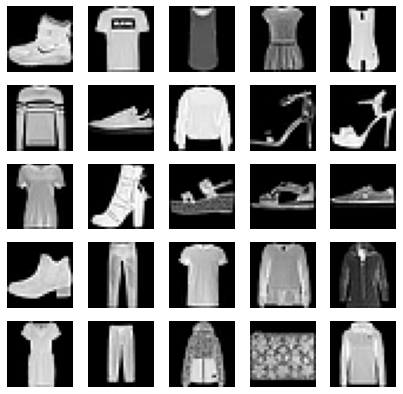

In [60]:
plt.figure(figsize=(7,7))
for i in range(25):  
    plt.subplot(5, 5, i+1)
    img=a[0][i][0].cpu().detach().numpy()
    plt.imshow(img, cmap=plt.get_cmap('gray'))
    plt.axis('off')
plt.show()

In [62]:
next(iter(train_dataloader))

[tensor([[[[0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.],
           ...,
           [0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.]]],
 
 
         [[[0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.],
           ...,
           [0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.]]],
 
 
         [[[0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.],
           ...,
           [0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.]]],
 
 
         ...,
 
 
         [[[0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.],
           ..

In [63]:
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cpu'

In [64]:
class NeuralNetwork(nn.Module):
    def __init__(self):
        super().__init__()
        self.flatten = nn.Flatten()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(28*28, 512),
            nn.ReLU(),
            nn.Linear(512, 512),
            nn.ReLU(),
            nn.Linear(512, 10)
        )

    def forward(self, x):
        x = self.flatten(x)
        logits = self.linear_relu_stack(x)
        return logits

model = NeuralNetwork().to(device)
print(model)

NeuralNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=784, out_features=512, bias=True)
    (1): ReLU()
    (2): Linear(in_features=512, out_features=512, bias=True)
    (3): ReLU()
    (4): Linear(in_features=512, out_features=10, bias=True)
  )
)


In [65]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=1e-3)

In [66]:
train_size = len(train_dataloader.dataset)
test_size = len(test_dataloader.dataset)
train_size, test_size

(60000, 10000)

In [67]:
epochs = 15

train_loss=0.0
test_loss=0.0
train_acc=0.0
test_acc=0.0

for epoch in range(epochs):

    model.train()
    for X, y in train_dataloader:
        X, y = X.to(device), y.to(device)
        pred = model(X).to(device)
        loss = loss_fn(pred, y)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        train_loss+=loss.item()
        train_acc += (pred.argmax(1) == y).type(torch.float).sum().item()
    with torch.no_grad():
        for X, y in test_dataloader:
            X, y = X.to(device), y.to(device)
            pred = model(X).to(device)
            loss=loss_fn(pred, y).item()
            test_loss += loss
            test_acc += (pred.argmax(1) == y).type(torch.float).sum().item()
    train_loss /= len(train_dataloader)
    test_loss /= len(test_dataloader)
    train_acc /= train_size
    test_acc /= test_size  
    print(f'epoch: {epoch+1}, train_loss: {np.round(train_loss,5)}, \
test_acc: {np.round(train_acc,5)}, test_loss: {np.round(test_loss,5)}, \
test_acc: {np.round(test_acc,5)}')

epoch: 1, train_loss: 2.24897, test_acc: 0.35407, test_loss: 2.1739, test_acc: 0.5282
epoch: 2, train_loss: 2.05985, test_acc: 0.58412, test_loss: 1.9258, test_acc: 0.61595
epoch: 3, train_loss: 1.71941, test_acc: 0.63261, test_loss: 1.54281, test_acc: 0.62476
epoch: 4, train_loss: 1.37793, test_acc: 0.63449, test_loss: 1.26506, test_acc: 0.63426
epoch: 5, train_loss: 1.15952, test_acc: 0.64948, test_loss: 1.09717, test_acc: 0.64686
epoch: 6, train_loss: 1.02483, test_acc: 0.66389, test_loss: 0.99064, test_acc: 0.65916
epoch: 7, train_loss: 0.93603, test_acc: 0.67874, test_loss: 0.91786, test_acc: 0.67317
epoch: 8, train_loss: 0.87319, test_acc: 0.69213, test_loss: 0.86486, test_acc: 0.68687
epoch: 9, train_loss: 0.82613, test_acc: 0.70546, test_loss: 0.82421, test_acc: 0.70077
epoch: 10, train_loss: 0.78924, test_acc: 0.71821, test_loss: 0.79167, test_acc: 0.71337
epoch: 11, train_loss: 0.75914, test_acc: 0.7308, test_loss: 0.76458, test_acc: 0.72327
epoch: 12, train_loss: 0.73367, te

In [68]:
torch.save(model.state_dict(), "model.pth")

In [69]:
model = NeuralNetwork().to(device)
model.load_state_dict(torch.load("model.pth"))

<All keys matched successfully>

In [80]:
classes = [
    "T-shirt/top",
    "Trouser",
    "Pullover",
    "Dress",
    "Coat",
    "Sandal",
    "Shirt",
    "Sneaker",
    "Bag",
    "Ankle boot",
]

model.eval()
id=35
x, y = test_data[id][0], test_data[id][1]
with torch.no_grad():
    pred = model(x)
    predicted, actual = classes[pred[0].argmax(0)], classes[y]
    print(f'Predicted: "{predicted}", Actual: "{actual}"')

Predicted: "T-shirt/top", Actual: "T-shirt/top"


In [81]:
pred_img=test_data[id][0][0].cpu().detach().numpy()
_=plt.imshow(pred_img,cmap=plt.get_cmap('gray'))